In [15]:
import sympy as sym
from sympy.vector import CoordSys3D, Del
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import sin,cos
from scipy.optimize import fsolve, root
import matplotlib.pyplot as plt
# import sympy.vector

符号初始化

In [39]:
N = CoordSys3D('N')
x = N.x
y = N.y
z = N.z

In [17]:
from sympy.abc import k,l,m,kappa,M,S,h
S0 = sym.symbols('S0')
kH = sym.symbols('kH')

In [18]:
kH      = sym.sqrt(k**2 + l**2)
kappa   = sym.sqrt(kH**2 + m**2)
S = S0 * sym.cos(k*x) * sym.cos(l*y) * sym.sin(m*z)
# 基本风分量
u_basic = M * sym.sin(kappa*(z-h/2))
v_basic = M * sym.cos(kappa*(z-h/2))

In [19]:
# 扰动风分量
u_d = sym.diff(S,z,x) - kappa*sym.diff(S,y)
v_d = sym.diff(S,z,y) - kappa*sym.diff(S,x)
w_d = kH**2 * S

In [20]:
V_basic = N.i * u_basic + N.j * v_basic     # 基本风矢量
V_d     = N.i * u_d + N.j * v_d + N.k * w_d # 扰动风矢量
V_allin = V_basic + V_d                     # 全风场矢量

In [37]:
delop = Del()
curl_V_d     = delop.cross(V_d,     doit = True)  # 基本风涡度
curl_V_basic = delop.cross(V_basic, doit = True)  # 扰动风涡度
curl_V_allin   = delop.cross(V_allin, doit = True)# 全风场涡度


## 1 基本风矢量 和 水平涡度 之间的关系 及螺旋度的空间变化：

In [22]:
# sym.simplify(V_basic.cross(curl_V_allin))

In [66]:
V_basic.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2})

(15*sin(sqrt(3)*pi*(N.z - 7500)/15000))*N.i + (15*cos(sqrt(3)*pi*(N.z - 7500)/15000))*N.j

In [71]:
curl_V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2}) * 15000 / sym.pi / sqrt(3)

(sqrt(3)*(-10.0*sqrt(3)*pi*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) - 30.0*pi*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + 15*sqrt(3)*pi*sin(sqrt(3)*pi*(N.z - 7500)/15000))/(3*pi))*N.i + (sqrt(3)*(30.0*pi*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) + 10.0*sqrt(3)*pi*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + 15*sqrt(3)*pi*cos(sqrt(3)*pi*(N.z - 7500)/15000))/(3*pi))*N.j

In [65]:
#计算基本风速场的螺旋度
H_basic = V_basic.dot(curl_V_allin)
H_basic

M*(M*sqrt(k**2 + l**2 + m**2)*sin((N.z - h/2)*sqrt(k**2 + l**2 + m**2)) - S0*k*m*sqrt(k**2 + l**2 + m**2)*sin(N.x*k)*cos(N.y*l)*cos(N.z*m) - S0*l*m**2*sin(N.y*l)*sin(N.z*m)*cos(N.x*k) - S0*l*(k**2 + l**2)*sin(N.y*l)*sin(N.z*m)*cos(N.x*k))*sin((N.z - h/2)*sqrt(k**2 + l**2 + m**2)) + M*(M*sqrt(k**2 + l**2 + m**2)*cos((N.z - h/2)*sqrt(k**2 + l**2 + m**2)) + S0*k*m**2*sin(N.x*k)*sin(N.z*m)*cos(N.y*l) + S0*k*(k**2 + l**2)*sin(N.x*k)*sin(N.z*m)*cos(N.y*l) + S0*l*m*sqrt(k**2 + l**2 + m**2)*sin(N.y*l)*cos(N.x*k)*cos(N.z*m))*cos((N.z - h/2)*sqrt(k**2 + l**2 + m**2))

In [64]:
# 带入具体参数之后用于后面使用plot3d进行绘图
H_basic_sub = H_basic.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h})
H_basic_sub = H_basic_sub.subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2})
# H_basic_sub = H_basic_sub.subs({z:100})
# sym.simplify(H_basic_sub).evalf() # 是xn yn 函数


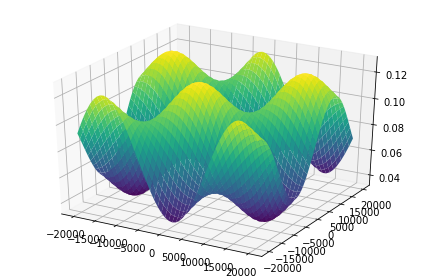

In [27]:
from sympy.plotting import plot3d
x_plotx = symbols('x')
y_ploty = symbols('y')
plot3d(H_basic_sub.subs({x:x_plotx,y:y_ploty,z:100}),(x_plotx,-20000,20000),(y_ploty,-20000,20000))

## 2 全风场风矢量和涡度矢之间的关系，以及螺旋度的空间变化关系

In [59]:
V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})
# factor(curl_V_bas)

(-10.0*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) + 10.0*sqrt(3)*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + 15*sin(sqrt(3)*pi*(N.z - 7500)/15000))*N.i + (10.0*sqrt(3)*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) - 10.0*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + 15*cos(sqrt(3)*pi*(N.z - 7500)/15000))*N.j + (20.0*sin(N.z*pi/15000)*cos(N.x*pi/15000)*cos(N.y*pi/15000))*N.k

In [60]:
curl_V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})

(-0.000666666666666667*sqrt(3)*pi*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) - 0.002*pi*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + sqrt(3)*pi*sin(sqrt(3)*pi*(N.z - 7500)/15000)/1000)*N.i + (0.002*pi*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) + 0.000666666666666667*sqrt(3)*pi*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + sqrt(3)*pi*cos(sqrt(3)*pi*(N.z - 7500)/15000)/1000)*N.j

In [31]:
H_allin = V_allin.dot(curl_V_allin)
sym.simplify(H_allin)

S0**2*(k**2 - l**2)*(k**2 + l**2)*sqrt(k**2 + l**2 + m**2)*sin(N.z*m)**2*cos(N.x*k)**2*cos(N.y*l)**2 - (M*sin((2*N.z - h)*sqrt(k**2 + l**2 + m**2)/2) - S0*k*m*sin(N.x*k)*cos(N.y*l)*cos(N.z*m) + S0*l*sqrt(k**2 + l**2 + m**2)*sin(N.y*l)*sin(N.z*m)*cos(N.x*k))*(-M*sqrt(k**2 + l**2 + m**2)*sin((2*N.z - h)*sqrt(k**2 + l**2 + m**2)/2) + S0*k*m*sqrt(k**2 + l**2 + m**2)*sin(N.x*k)*cos(N.y*l)*cos(N.z*m) + S0*l*m**2*sin(N.y*l)*sin(N.z*m)*cos(N.x*k) + S0*l*(k**2 + l**2)*sin(N.y*l)*sin(N.z*m)*cos(N.x*k)) + (M*cos((2*N.z - h)*sqrt(k**2 + l**2 + m**2)/2) + S0*k*sqrt(k**2 + l**2 + m**2)*sin(N.x*k)*sin(N.z*m)*cos(N.y*l) - S0*l*m*sin(N.y*l)*cos(N.x*k)*cos(N.z*m))*(M*sqrt(k**2 + l**2 + m**2)*cos((2*N.z - h)*sqrt(k**2 + l**2 + m**2)/2) + S0*k*m**2*sin(N.x*k)*sin(N.z*m)*cos(N.y*l) + S0*k*(k**2 + l**2)*sin(N.x*k)*sin(N.z*m)*cos(N.y*l) + S0*l*m*sqrt(k**2 + l**2 + m**2)*sin(N.y*l)*cos(N.x*k)*cos(N.z*m))

In [32]:
H_allin_sub = H_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h})
H_allin_sub = H_allin_sub.subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})

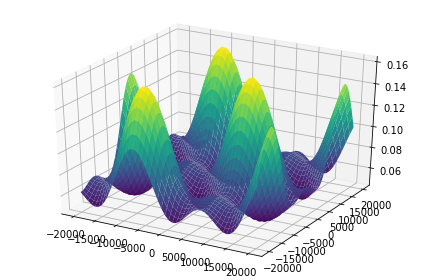

In [33]:
from sympy import *
x_plotx = symbols('x')
y_ploty = symbols('y')
plot3d(H_allin_sub.subs({x:x_plotx,y:y_ploty,z:100}),(x_plotx,-20000,20000),(y_ploty,-20000,20000))

## 计算运动轨迹

In [34]:
V_allin_count = V_allin.subs({k:sym.pi/h,l:sym.pi/h,m:sym.pi/h}).subs({h:15000,M:15,S0:2.25*1e9/sym.pi**2,M:15})
V_allin_count

(-10.0*sin(N.x*pi/15000)*cos(N.y*pi/15000)*cos(N.z*pi/15000) + 10.0*sqrt(3)*sin(N.y*pi/15000)*sin(N.z*pi/15000)*cos(N.x*pi/15000) + 15*sin(sqrt(3)*pi*(N.z - 7500)/15000))*N.i + (10.0*sqrt(3)*sin(N.x*pi/15000)*sin(N.z*pi/15000)*cos(N.y*pi/15000) - 10.0*sin(N.y*pi/15000)*cos(N.x*pi/15000)*cos(N.z*pi/15000) + 15*cos(sqrt(3)*pi*(N.z - 7500)/15000))*N.j + (20.0*sin(N.z*pi/15000)*cos(N.x*pi/15000)*cos(N.y*pi/15000))*N.k

In [58]:
V_allin_count.subs({y:100,z:100,x:100}).evalf()

(-6.82288960307987)*N.i + (-13.6613193970623)*N.j + 0.418664697063352*N.k

In [199]:
initial_x = 0.
initial_y = 0.
initial_z = 0.
diffeq_u = Eq(V_allin_count.dot(N.i).subs({y:initial_y,z:initial_z}),)
diffeq_v = Eq(V_allin_count.dot(N.i).subs({x:initial_x,z:initial_z}),0)
diffeq_w = Eq(V_allin_count.dot(N.i).subs({x:initial_x,y:initial_y}),0)

In [205]:
sym.dsolve(diffeq_u)

ValueError: The function cannot be automatically detected for -10.0*sin(N.x*pi/15000) - 15*sin(sqrt(3)*pi/2).